In [4]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
from google.colab import files
uploaded = files.upload()

Saving ab_test_summary.csv to ab_test_summary (1).csv


In [10]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [14]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [18]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [19]:
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [22]:
df['converted'] = df['converted'].astype(int)

In [24]:
df['test group'].value_counts()

,count
test group,
ad,564577
psa,23524


In [25]:
control = df[df['test group'] == 'psa']
test = df[df['test group'] == 'ad']

In [26]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

control_rate, test_rate

(np.float64(0.01785410644448223), np.float64(0.025546559636683747))

In [27]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['test group'], df['converted'])
table

converted,0,1
test group,,
ad,550154,14423
psa,23104,420


Decision Rule:

If p-value < 0.05 → Reject the null hypothesis (H0).
If p-value ≥ 0.05 → Fail to reject the null hypothesis (H0).

In [29]:
import numpy as np
from scipy.stats import norm

p1 = control_rate
p2 = test_rate
n1 = len(control)
n2 = len(test)

diff = p2 - p1
se = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
z = norm.ppf(0.975)   # 95% confidence

ci_lower = diff - z*se
ci_upper = diff + z*se

ci_lower, ci_upper

(np.float64(0.0059509324316110055), np.float64(0.009433973952792028))

The confidence interval represents the range in which the true difference
between conversion rates is likely to lie.

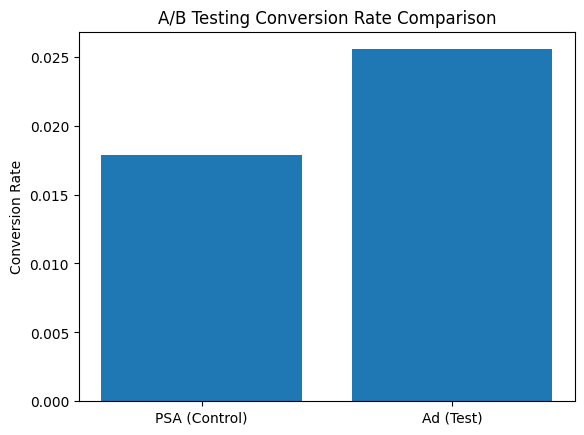

In [30]:
import matplotlib.pyplot as plt

rates = [control_rate, test_rate]
labels = ['PSA (Control)', 'Ad (Test)']

plt.bar(labels, rates)
plt.ylabel('Conversion Rate')
plt.title('A/B Testing Conversion Rate Comparison')
plt.show()

In [31]:
summary = pd.DataFrame({
    'Group': ['PSA (Control)', 'Ad (Test)'],
    'Users': [len(control), len(test)],
    'Conversion_Rate': [control_rate, test_rate]
})

summary

,Group,Users,Conversion_Rate
0,PSA (Control),23524,0.017854
1,Ad (Test),564577,0.025547


In [32]:
summary.to_csv('ab_test_summary.csv', index=False)

In [34]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['test group'], df['converted'])
chi2, p_value, dof, expected = chi2_contingency(table)

p_value

np.float64(1.9989623063390075e-13)

In [35]:
with open('final_recommendation.txt', 'w') as f:
    f.write(
        "The p-value obtained from the A/B test is extremely small (<< 0.05), "
        "indicating a statistically significant difference between the PSA "
        "and Ad groups. Therefore, the null hypothesis is rejected. "
        "It is recommended to roll out the Ad campaign as it shows "
        "a meaningful impact on user conversion."
    )